# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.117838e+01     7.952067e+00
 * time: 0.00410914421081543
     1     3.069434e+01     6.639917e+00
 * time: 0.015651226043701172
     2     1.896514e+01     2.968706e+00
 * time: 0.03805899620056152
     3     1.559834e+01     4.872287e+00
 * time: 0.05672407150268555
     4     1.350959e+01     2.545164e+00
 * time: 0.07537412643432617
     5     1.244801e+01     1.778329e+00
 * time: 0.09043502807617188
     6     1.105793e+01     2.998921e+00
 * time: 0.1056051254272461
     7     1.033919e+01     1.392925e+00
 * time: 0.12063002586364746
     8     9.890626e+00     1.003898e+00
 * time: 0.13572216033935547
     9     9.540204e+00     1.472153e+00
 * time: 0.15065813064575195
    10     9.247478e+00     4.850306e-01
 * time: 0.16576313972473145
    11     9.054795e+00     6.434807e-01
 * time: 0.18088006973266602
    12     9.007166e+00     1.300290e+00
 * time: 0.19220805168151855
    13     8.813743e+00     7.813279e-01
 * time:

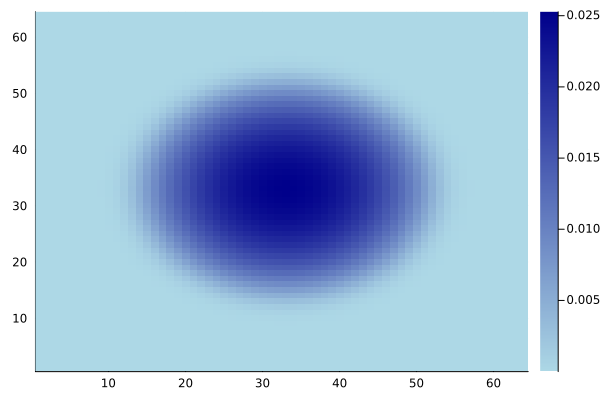

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)